In [ ]:
!pip install transformers

In [3]:
from transformers import pipeline
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
classifier = pipeline("sentiment-analysis")

In [5]:
classifier("This is such a great movie!")

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

In [5]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [7]:
import torch

In [8]:
torch.cuda.is_available()

True

In [10]:
torch.cuda.current_device()

0

In [12]:
classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [13]:
df_=pd.read_csv('AirlineTweets.csv')

In [14]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
df = df_[['airline_sentiment', 'text']].copy()

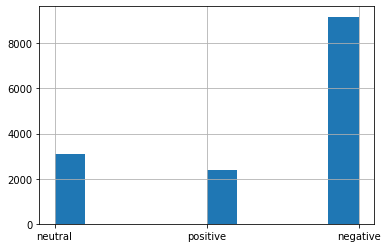

In [19]:
df['airline_sentiment'].hist()

In [20]:
df = df[df.airline_sentiment != 'neutral'].copy()

In [21]:
target_map = {'positive' : 1, 'negative' : 0}
df['target'] = df['airline_sentiment'].map(target_map)

In [22]:
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [23]:
len(df)

11541

In [28]:
texts = df['text'].tolist()

In [29]:
predictions = classifier(texts)

In [ ]:
predictions

In [33]:
probs = [d['score'] if d['label'].startswith('P') else 1-d['score']  for d in predictions]

In [ ]:
probs

In [35]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

In [38]:
preds

array([1, 0, 0, ..., 1, 0, 0])

In [36]:
preds = np.array(preds)

In [ ]:
preds

In [37]:
print('acc: ', np.mean(df['target'] == preds))

acc:  0.8898708950697514


In [40]:
cm = confusion_matrix(df['target'], preds, normalize='true')

In [41]:
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

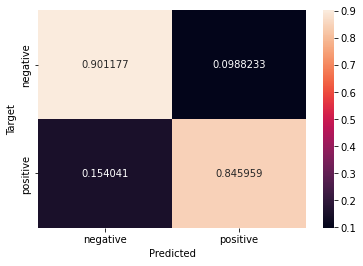

In [42]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index = classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
plot_cm(cm)

In [43]:
f1_score(df['target'], preds)

0.7587777566900741

In [46]:
# invert target and predictions
f1_score(1-df['target'], 1-preds)

0.928647616908999

In [47]:
roc_auc_score(df['target'], probs)

0.9485933999009757

In [48]:
roc_auc_score(1-df['target'], 1-np.array(probs))

0.9485933999009756